In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
checker = pd.read_sql("SELECT * FROM checker;", conn)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
query = """
SELECT 
    DATE(timestamp) as date,
    CAST(strftime('%H', timestamp) AS INTEGER) as hour,
    CASE 
        WHEN strftime('%w', timestamp) IN ('0', '6') THEN 'weekend'
        ELSE 'working_day'
    END as week_time,
    count(*) as commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date, hour,  week_time
"""

checker = pd.read_sql(query, conn, index_col='date')

checker_weekend = checker[checker['week_time'] == 'weekend']
checker_working_day = checker[checker['week_time'] == 'working_day']

avg_commits = checker.groupby(['hour', 'week_time'])['commits'].mean().unstack()
avg_commits = avg_commits.fillna(0)

avg_commits

week_time,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
3,1.000000,2.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


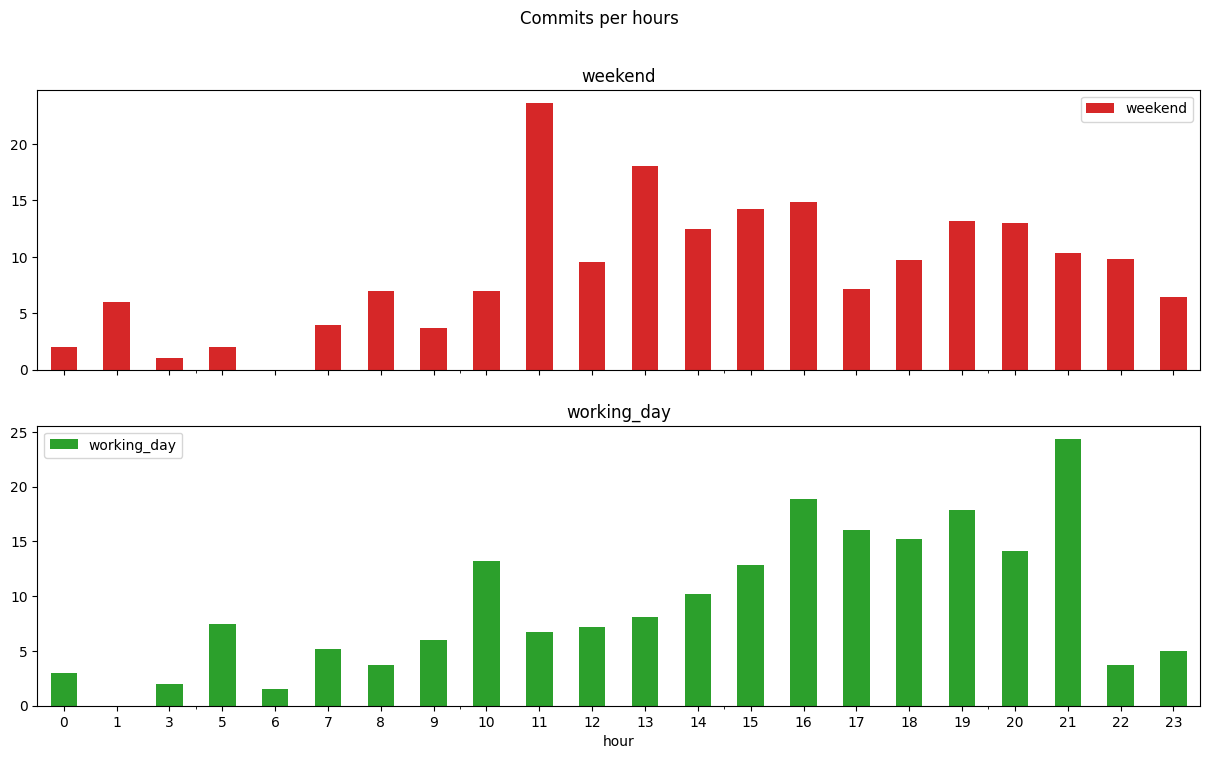

In [5]:
axes = avg_commits.plot.bar(
    figsize=(15, 8), 
    title='Commits per hours', 
    subplots=True, 
    color=['tab:red', 'tab:green'])
for ax in axes:
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('hour')


In [6]:
conn.close()